In [4]:
# imports
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['font.size'] = 11
import numpy as np
import scipy.constants as spc
import random

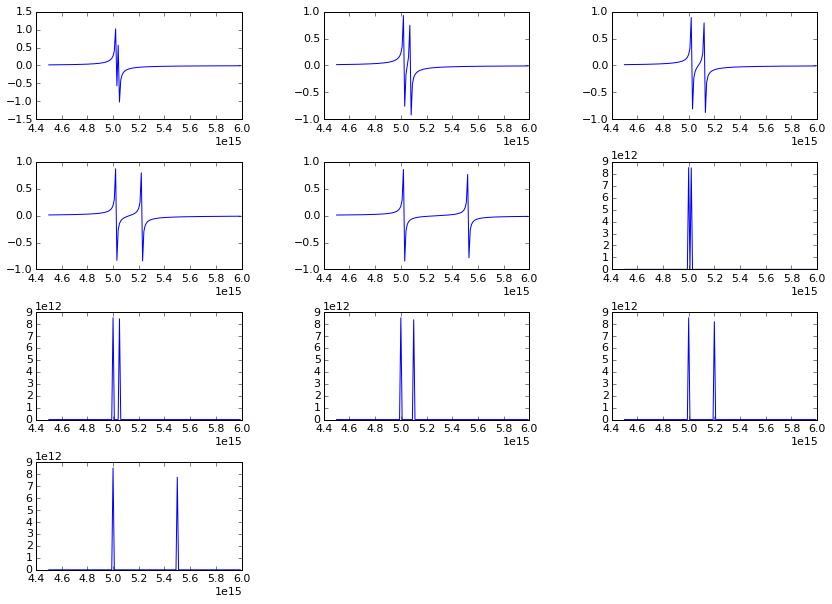

In [77]:
# problem 3
sep = np.array([0.2,0.5,1.0,2.0,5.0])

fig = plt.figure(figsize=[14, 10])
gs = matplotlib.gridspec.GridSpec(4, 3, width_ratios=[20, 20, 20], wspace=0.4, hspace=0.4)

N = 2.68e25/2
gamma = 1.0e14
m = 9.1e-31
w = np.arange(4.5,6.0,0.01)*1e15
e = 1.602e-19
e_o = 8.85e-12
wa1 = 5.0e15

for i in range(0,5):
    delta_w = sep[i]*gamma
    wa2 = wa1+delta_w

    chiprime = N*e**2*2/(m*e_o*wa1*(4*(wa1-w)+gamma))+N*e**2*2/(m*e_o*wa2*(4*(wa2-w)+gamma))
    chi2prime = N*e**2*gamma/(m*e_o*wa1*(4*(wa1-w)**2+gamma))+N*e**2*gamma/(m*e_o*wa2*(4*(wa2-w)**2+gamma))


    plt.subplot(gs[i])
    plt.plot(w,chiprime)
    plt.subplot(gs[i+5])
    plt.plot(w,chi2prime)

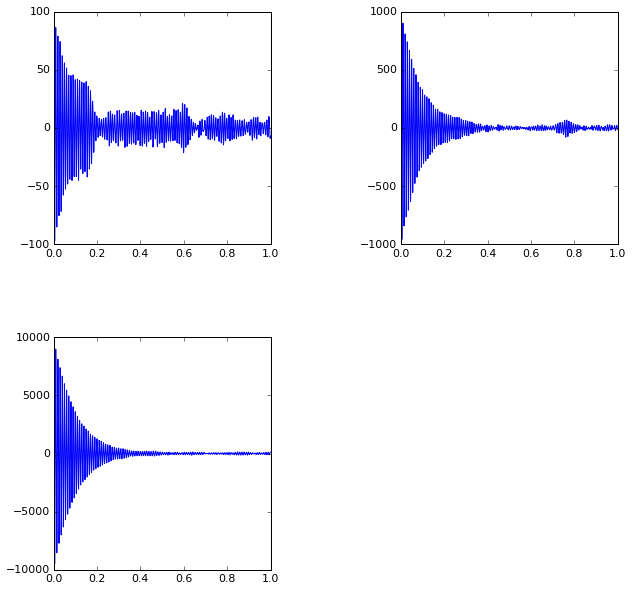

In [79]:
# problem 4
fig = plt.figure(figsize=[14, 10])
gs = matplotlib.gridspec.GridSpec(2, 2, width_ratios=[20, 20, 20], wspace=0.4, hspace=0.4)

for k in range(0,3):
    timesteps = 1000
    w_a = 2.0*spc.pi*100.0
    gamma_col = 10.0
    dt = 0.001
    V = 1.0
    mu = 1.0
    t = np.arange(0,timesteps*dt,dt)
    oscillators = 10**(k+2)
    phi = np.zeros(shape=(oscillators,timesteps))
    #P = np.arange(0,timesteps*dt,dt)

    for i in range(1,timesteps):
        #t[i] = t[i-1]+dt
        sig = np.random.rand(oscillators)
        phi[:,i] = phi[:,i-1]
        for j in range(0,np.int(oscillators)):
            if sig[j] < 0.01:
                phi[j,i] = random.uniform(0,2.0*3.14159)
        #P[i]=1.0/V*np.sum(mu*np.cos(w_a*t[i-1]+phi[:,i-1]))

    P_indiv = mu*np.cos(w_a*t+phi)
    P = 1.0/V*np.sum(P_indiv, axis=0)

    plt.subplot(gs[k])
    plt.plot(t,P)
